Processing OCR Images\AB.png


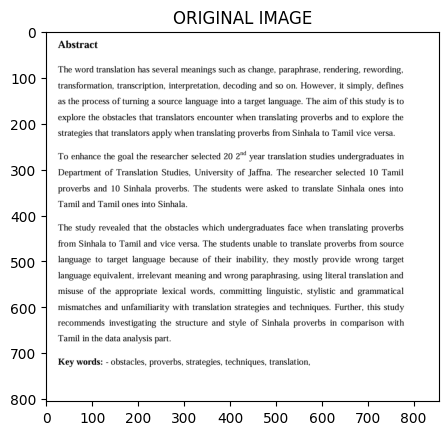

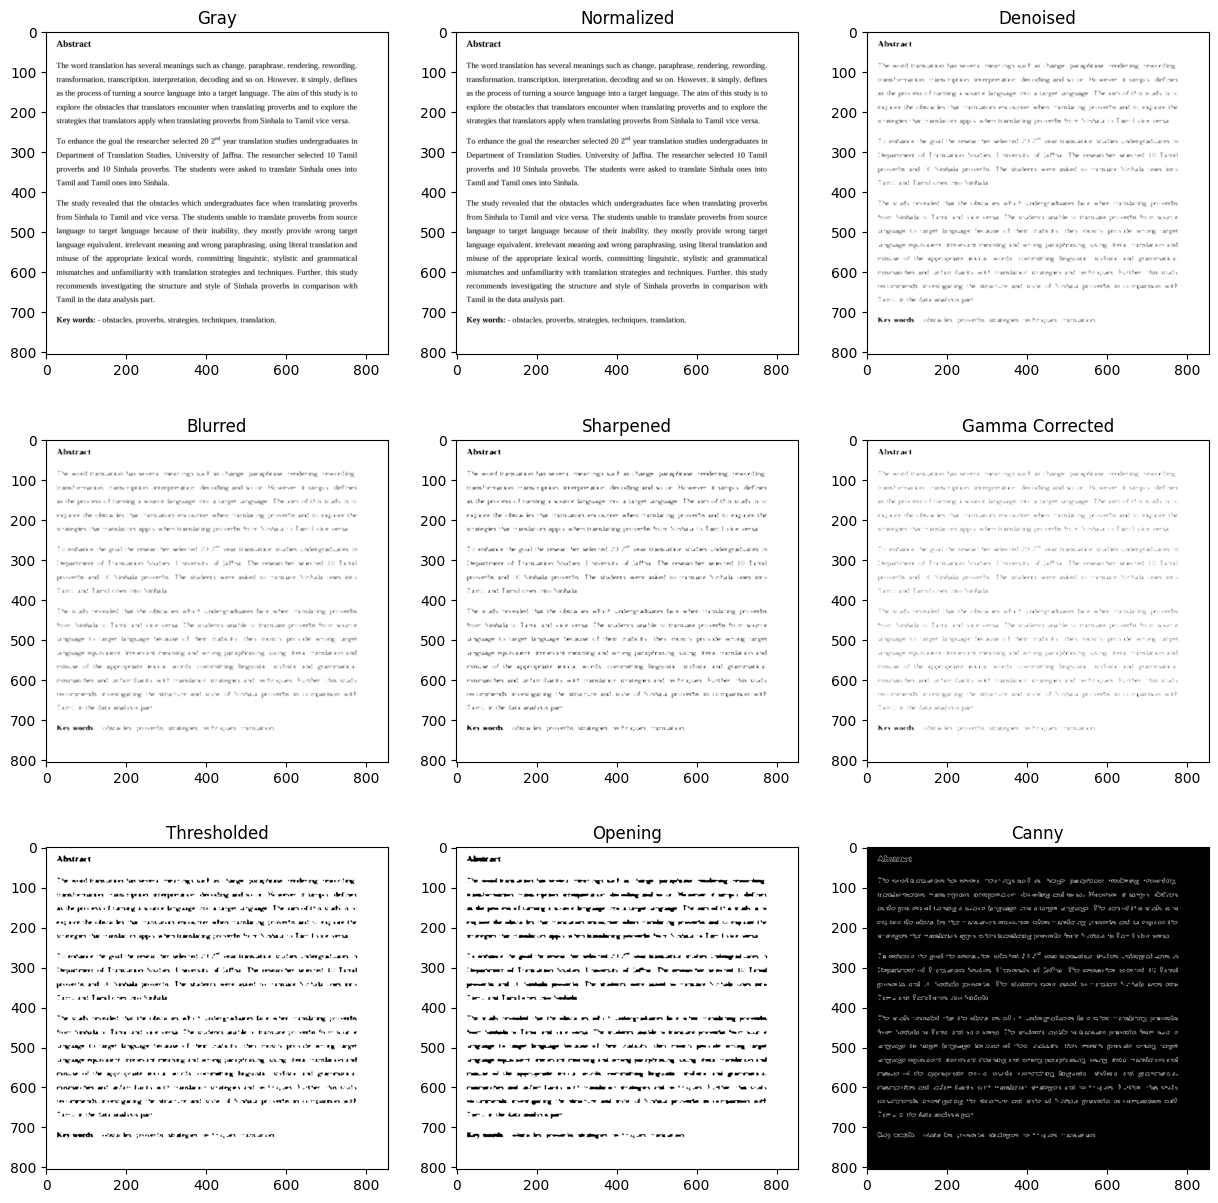

-----------------------------------------
TESSERACT OUTPUT --> OCR Images\AB.png
-----------------------------------------
Abstract

The word translation has several meanings such as change, paraphrase, rendering, rewording,
transformation, transcription, interpretation, decoding and so on. However, it simply, defines
as the process of turning a source language into a target language. The aim of this study is to
explore the obstacles that translators encounter when translating proverbs and to explore the
strategies that translators apply when translating proverbs from Sinhala to Tamil vice versa.
To enhance the goal the researcher selected 20 2" year translation studies undergraduates in
Department of Translation Studies, University of Jaffna. The researcher selected 10 Tamil
proverbs and 10 Sinhala proverbs. The students were asked to translate Sinhala ones into
Tamil and Tamil ones into Sinhala.

The study revealed that the obstacles which undergraduates face when translating proverb

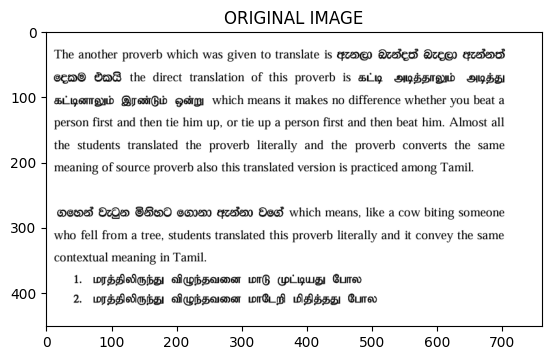

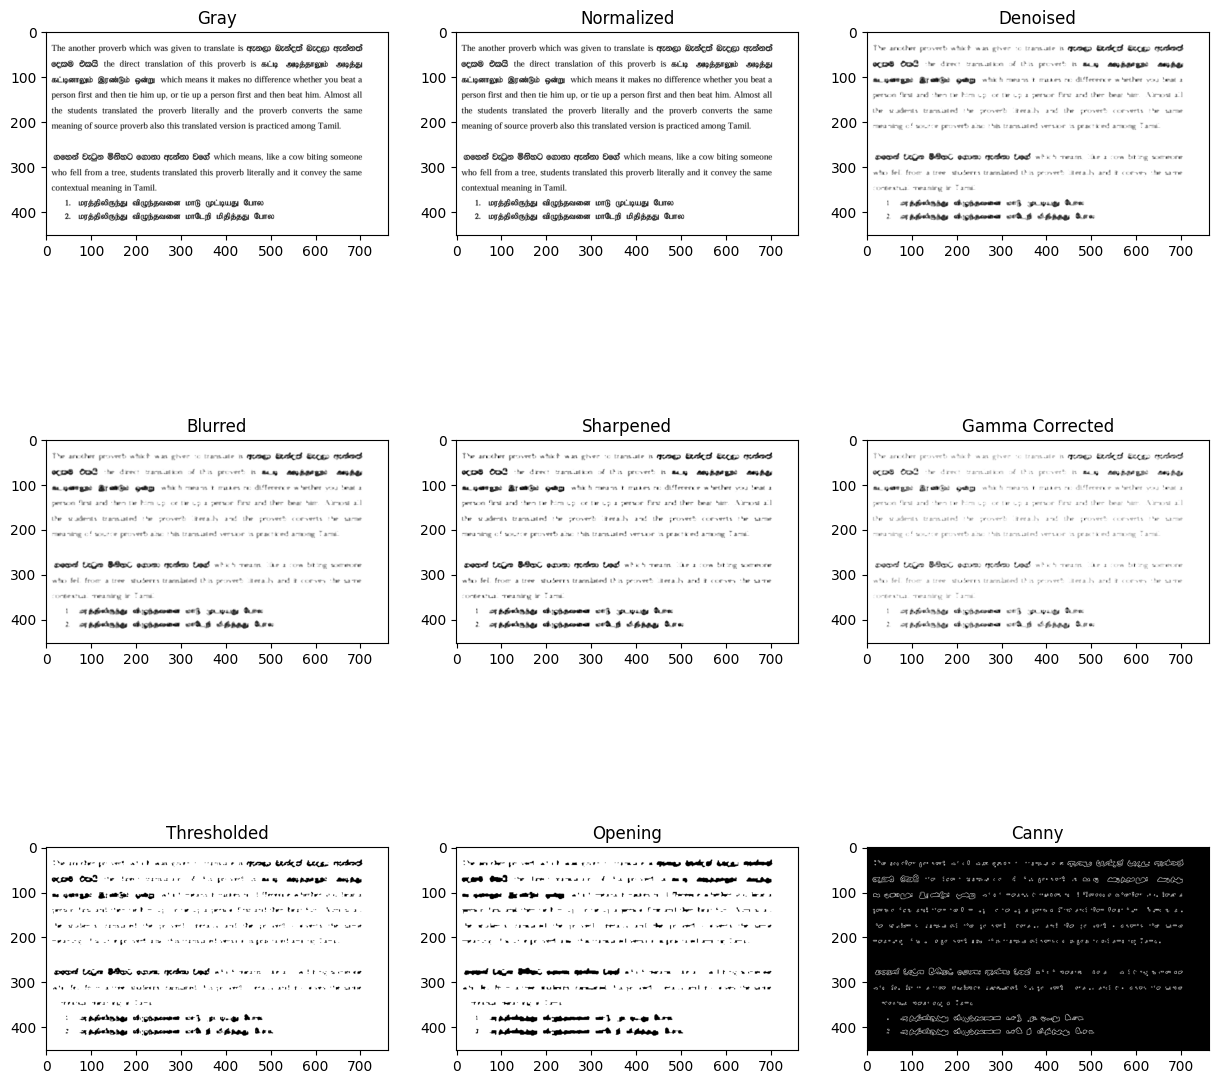

-----------------------------------------
TESSERACT OUTPUT --> OCR Images\Mixed.png
-----------------------------------------
The another proverb which was given to translate is ඇනලා බැන්දත්‌ බැදලා ඇන්නත්‌
දෙකම එකයි the direct translation of this proverb is கட்டி அடித்தாலும்‌ அடித்து
கட்டினாலும்‌ இரண்டும்‌ ஒன்று which means it makes no difference whether you beat a
person first and then tie him up, or tie up a person first and then beat him. Almost all
the students translated the proverb literally and the proverb converts the same
meaning of source proverb also this translated version is practiced among Tamil.
ගහෙන්‌ වැටුන මිනිහට ගොනා ඇන්නා වගේ which means, like a cow biting someone
who fell from a tree, students translated this proverb literally and it convey the same
contextual meaning in Tamil.

1. மரத்திலிருந்து விழுந்தவனை மாடு முட்டியது போல

2. மரத்திலிருந்து விழுந்தவனை மாடேறி மிதித்தது போல

OCR output saved to Outputs\Mixed.png.txt


In [2]:
from __future__ import division
from random import *
import re
import cv2 
import numpy as np
import os
import glob
import pytesseract
from PIL import Image
import matplotlib.image as mpimg
from pytesseract import Output
from matplotlib import pyplot as plt

# Set paths for Tesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'
TESSDATA_PREFIX = 'C:/Program Files/Tesseract-OCR'

# Preprocessing functions
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def normalize(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

def remove_noise(image):
    return cv2.medianBlur(image, 5)

def blur(image):
    return cv2.GaussianBlur(image, (5, 5), 0.5)

def sharpen(image):
    blurred = cv2.GaussianBlur(image, (0, 0), 3)
    return cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

def gamma_correction(image, gamma=2.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

def canny(image):
    return cv2.Canny(image, 100, 200)

def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

# Get all image files
files = glob.glob("OCR Images/*.png")
files += glob.glob("OCR Images/*.jpg")
files += glob.glob("OCR Images/*.jfif")

# Processing each image file
for myFile in files:
    print(f"Processing {myFile}")

    image = cv2.imread(myFile)
    plt.imshow(image)
    b, g, r = cv2.split(image)
    rgb_img = cv2.merge([r, g, b])
    plt.imshow(rgb_img)
    plt.title('ORIGINAL IMAGE')
    plt.show()

    # Apply preprocessing steps
    gray = get_grayscale(image)
    normalized = normalize(gray)
    denoised = remove_noise(normalized)
    blurred = blur(denoised)
    sharpened = sharpen(blurred)
    gamma_corrected = gamma_correction(sharpened)
    thresh = thresholding(gamma_corrected)
    opening_img = opening(thresh)
    canny_img = canny(thresh)

    # Display processed images
    images = {'Gray': gray, 
              'Normalized': normalized,
              'Denoised': denoised,
              'Blurred': blurred,
              'Sharpened': sharpened,
              'Gamma Corrected': gamma_corrected,
              'Thresholded': thresh, 
              'Opening': opening_img, 
              'Canny': canny_img}
    
    fig = plt.figure(figsize=(15, 15))
    ax = []
    rows = 3
    columns = 3
    keys = list(images.keys())
    for i in range(rows * columns):
        if i < len(keys):
            ax.append(fig.add_subplot(rows, columns, i + 1))
            ax[-1].set_title(keys[i])
            plt.imshow(images[keys[i]], cmap='gray')

    plt.show()

    # OCR with multiple languages (English, Tamil, Sinhala)
    print('-----------------------------------------')
    print(f'TESSERACT OUTPUT --> {myFile}')
    print('-----------------------------------------')
    custom_config = '--oem 3 --psm 6'
    text = pytesseract.image_to_string(normalized, config=custom_config, lang='eng+tam+sin+Sinhala+Tamil')
    print(text)

    # Save the output to a text file
    output_dir = "Outputs"
    os.makedirs(output_dir, exist_ok=True)
    output_file = os.path.join(output_dir, f"{os.path.basename(myFile)}.txt")
    with open(output_file, "a+", encoding="utf-8") as f:
        f.write(text)

    print(f"OCR output saved to {output_file}")


PDF

In [3]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
from pdf2image import convert_from_path

# Convert PDF pages to images
pdf_path = r'C:\Users\HP\Downloads\SWORN\PDFS\proverb.pdf'
pages = convert_from_path(pdf_path, 300)  # 300 dpi for high-quality images

# Extract text from each page
extracted_text = ""

# Specify languages for OCR: Sinhala (sin), Tamil (tam), and English (eng)
languages = "eng+tam+sin+Sinhala+Tamil"

for page_number, page_image in enumerate(pages, start=1):
    # Convert PIL image to OpenCV format
    image = np.array(page_image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Preprocessing steps
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    normalized = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)  # Normalize brightness/contrast
    blurred = cv2.medianBlur(normalized, 3)  # Reduce noise
    sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])  # Sharpen kernel
    sharpened = cv2.filter2D(blurred, -1, sharpen_kernel)
    _, binary = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Otsu's thresholding

    # Perform OCR on the preprocessed image
    text = pytesseract.image_to_string(normalized, lang=languages, config='--psm 3')
    extracted_text += f"--- Page {page_number} ---\n"
    extracted_text += text + "\n"

# Print or process the extracted text
print(extracted_text)


--- Page 1 ---
ResearchGate

See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/361407523

The issues and strategies of translating proverbs from Sinhala to Tamil vice
versa

Conference Paper: June 2022

CITATIONS READS
0 784
1 author:

Ramanadhan Priyanadhi
University of Jaffna
7 PUBLICATIONS 0 CITATIONS

SEE PROFILE

All content following this page was uploaded by Ramanadhan Priyanadhi on 19 June 2022.

The user has requested enhancement of the downloaded file.

--- Page 2 ---
The issues and strategies of translating proverbs from Sinhala to Tamil

vice versa.
Priyanadhi Ramanadhan

Translator
Central Bank of Sri Lanka

priyanadhee@gmail.com
0776348232

Abstract

The word translation has several meanings such as change, paraphrase, rendering, rewording,
transformation, transcription, interpretation, decoding and so on. However, it simply, defines
as the process of turning a source language into a target language. The aim of t

clean text

In [4]:
import re
import cv2
import numpy as np
import pytesseract
from PIL import Image
from pdf2image import convert_from_path

# Text cleaning function
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters
    text = re.sub(r'[#$%^&*_+=<>~|]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Convert PDF pages to images
pdf_path = r'C:\Users\HP\Downloads\SWORN\PDFS\proverb.pdf'
pages = convert_from_path(pdf_path, 300)  # 300 dpi for high-quality images

# Extract text from each page
extracted_text = ""
languages = "eng+tam+sin+Sinhala+Tamil"  # Specify languages for OCR

for page_number, page_image in enumerate(pages, start=1):
    # Convert PIL image to OpenCV format
    image = np.array(page_image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Preprocessing steps
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    normalized = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)  # Normalize brightness/contrast
    blurred = cv2.medianBlur(normalized, 3)  # Reduce noise
    sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])  # Sharpen kernel
    sharpened = cv2.filter2D(blurred, -1, sharpen_kernel)
    _, binary = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Otsu's thresholding

    # Perform OCR on the preprocessed image with layout detection
    text = pytesseract.image_to_string(normalized, lang=languages, config='--psm 4')

    # Clean extracted text
    cleaned_text = clean_text(text)

    # Add page-specific heading and maintain document structure
    extracted_text += f"--- Page {page_number} ---\n"
    extracted_text += cleaned_text + "\n"
 
    

# Save the cleaned text to a file or print
output_path = "structured_extracted_text.txt"
with open(output_path, "w", encoding="utf-8") as file:
    file.write(extracted_text)

# Print scrollable text
print(extracted_text)


--- Page 1 ---
ResearchGate See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/361407523 The issues and strategies of translating proverbs from Sinhala to Tamil vice versa Conference Paper: June 2022 CITATIONS READS 0 784 1 author: Ramanadhan Priyanadhi University of Jaffna 7 PUBLICATIONS 0 CITATIONS SEE PROFILE All content following this page was uploaded by Ramanadhan Priyanadhi on 19 June 2022. The user has requested enhancement of the downloaded file.
--- Page 2 ---
The issues and strategies of translating proverbs from Sinhala to Tamil vice versa. Priyanadhi Ramanadhan Translator Central Bank of Sri Lanka priyanadhee@gmail.com 0776348232 Abstract The word translation has several meanings such as change, paraphrase, rendering, rewording, transformation, transcription, interpretation, decoding and so on. However, it simply, defines as the process of turning a source language into a target language. The aim of this study is t

In [5]:
import re
import cv2
import numpy as np
import pytesseract
from PIL import Image

# Text cleaning function
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters
    text = re.sub(r'[@#$%^&*_+=<>~|]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Path to the image file
image_path = r'C:\Users\HP\Downloads\SWORN\IMG\eliya.jpg'  # Update with your image path

# Load the image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image file not found at {image_path}")

# Preprocessing steps
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
normalized = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)  # Normalize brightness/contrast
blurred = cv2.medianBlur(normalized, 3)  # Reduce noise
sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])  # Sharpen kernel
sharpened = cv2.filter2D(blurred, -1, sharpen_kernel)
_, binary = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Otsu's thresholding

# Perform OCR on the preprocessed image
languages = "eng+tam+sin+Sinhala+Tamil"  # Specify languages for OCR
text = pytesseract.image_to_string(binary, lang=languages, config='--psm 4')

# Clean extracted text
cleaned_text = clean_text(text)

# Save the cleaned text to a file or print
output_path = "extracted_text.txt"
with open(output_path, "w", encoding="utf-8") as file:
    file.write(cleaned_text)

# Print extracted text
print(cleaned_text)

ණි ' නුචර එළිය நுவிரலியா NUWAR ELIYA ELEVATION 1893m ABOVE MSL


In [6]:



import re
import cv2
import numpy as np
import pytesseract
from PIL import Image
from pdf2image import convert_from_path
from docx import Document  # Library for creating Word documents

# Text cleaning function
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters
    text = re.sub(r'[@#$%^&*_+=<>~|]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\\s+', ' ', text).strip()
    return text

# Convert PDF pages to images
pdf_path = r'C:\Users\HP\Downloads\SWORN\PDFS\proverb.pdf'
pages = convert_from_path(pdf_path, 300)  # 300 dpi for high-quality images

# Initialize a Word document
doc = Document()
doc.add_heading('Extracted Text from PDF', level=1)

# Extract text from each page
languages = "eng+tam+sin+Sinhala+Tamil"  # Specify languages for OCR

for page_number, page_image in enumerate(pages, start=1):
    # Convert PIL image to OpenCV format
    image = np.array(page_image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Preprocessing steps
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    normalized = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)  # Normalize brightness/contrast
    blurred = cv2.medianBlur(normalized, 3)  # Reduce noise
    sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])  # Sharpen kernel
    sharpened = cv2.filter2D(blurred, -1, sharpen_kernel)
    _, binary = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Otsu's thresholding

    # Perform OCR on the preprocessed image with layout detection
    text = pytesseract.image_to_string(binary, lang=languages, config='--psm 4')

    # Clean extracted text
    cleaned_text = clean_text(text)

    # Add page-specific heading and maintain document structure in Word
    doc.add_heading(f'Page {page_number}', level=2)
    doc.add_paragraph(cleaned_text)

# Save the Word document
word_output_path = "structured_extracted_text.docx"
doc.save(word_output_path)

print(f"Word document created and saved at {word_output_path}")



Word document created and saved at structured_extracted_text.docx


In [7]:
from googletrans import Translator
from docx import Document
import os

def translate_multilingual_file(file_path, target_language):
    """
    Translates a multilingual text file (.docx or .txt) into the specified target language.
    
    Parameters:
        file_path (str): The path to the source file.
        target_language (str): The language code for the desired target language (e.g., 'ta' for Tamil).
    """
    
    translator = Translator()

    # Determine file type
    _, file_extension = os.path.splitext(file_path)

    if file_extension.lower() == '.docx':
        # Handle .docx files
        document = Document(file_path)
        translated_text = []

        for paragraph in document.paragraphs:
            if paragraph.text.strip():  # Skip empty paragraphs
                translated = translator.translate(paragraph.text, src='auto', dest=target_language)
                translated_text.append(translated.text)

        # Save translated content to a new .docx file
        output_file = f"translated_to_{target_language}.docx"
        new_doc = Document()
        for text in translated_text:
            new_doc.add_paragraph(text)
        new_doc.save(output_file)
        print(f"Translation saved to {output_file}")

    elif file_extension.lower() == '.txt':
        # Handle .txt files
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        translated_lines = []
        for line in lines:
            if line.strip():  # Skip empty lines
                translated = translator.translate(line.strip(), src='auto', dest=target_language)
                translated_lines.append(translated.text)

        # Save translated content to a new .txt file
        output_file = f"translated_to_{target_language}.txt"
        with open(output_file, 'w', encoding='utf-8') as file:
            file.write("\n".join(translated_lines))
        print(f"Translation saved to {output_file}")

    else:
        print("Unsupported file format. Please upload a .docx or .txt file.")

# Example usage:
file_path = r"C:\Users\HP\Downloads\SWORN\PDFS\multilingual_sample.txt"  # Replace with the actual file path
target_language = "en"  # 'ta' for Tamil, or any other language code
translate_multilingual_file(file_path, target_language)


ConnectTimeout: _ssl.c:980: The handshake operation timed out

user select perefred language from tamil english sinhala to translate whole document of mixed language into one language

In [ ]:
from googletrans import Translator
from docx import Document
from gtts import gTTS  # For text-to-speech
import os

def translate_and_convert_to_speech(file_path, target_language):
    """
    Translates a multilingual text file (.docx or .txt) into the specified target language
    and converts the translated text to speech.

    Parameters:
        file_path (str): The path to the source file.
        target_language (str): The language code for the desired target language (e.g., 'ta' for Tamil).
    """
    translator = Translator()

    # Determine file type
    _, file_extension = os.path.splitext(file_path)
    translated_text = []

    if file_extension.lower() == '.docx':
        # Handle .docx files
        document = Document(file_path)
        for paragraph in document.paragraphs:
            if paragraph.text.strip():  # Skip empty paragraphs
                translated = translator.translate(paragraph.text, src='auto', dest=target_language)
                translated_text.append(translated.text)

    elif file_extension.lower() == '.txt':
        # Handle .txt files
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        for line in lines:
            if line.strip():  # Skip empty lines
                translated = translator.translate(line.strip(), src='auto', dest=target_language)
                translated_text.append(translated.text)

    else:
        print("Unsupported file format. Please upload a .docx or .txt file.")
        return

    # Save the translated text
    output_file = f"translated_to_{target_language}.txt"
    with open(output_file, 'w', encoding='utf-8') as file:
        file.write("\n".join(translated_text))
    print(f"Translation saved to {output_file}")

    # Convert the translated text to speech
    full_text = " ".join(translated_text)  # Combine all text into a single string
    tts = gTTS(full_text, lang=target_language)
    audio_file = f"translated_to_{target_language}.mp3"
    tts.save(audio_file)
    print(f"Audio file saved to {audio_file}")

# Example usage:
file_path = r"C:\Users\HP\Downloads\SWORN\Mixed.png.txt"  # Replace with the actual file path
target_language = "si"  # 'ta' for Tamil, 'en' for English, etc. user have to select 
translate_and_convert_to_speech(file_path, target_language)


ConnectTimeout: _ssl.c:980: The handshake operation timed out

the above only read sinhala eng 

read the text 3 language at once

In [10]:
from googletrans import Translator
from docx import Document
from gtts import gTTS
import os

def text_to_speech(file_path, target_language):
    """
    Converts the content of a text file (.txt) into speech.

    Parameters:
        file_path (str): The path to the text file.
        target_language (str): The language code for the desired speech language (e.g., 'ta' for Tamil, 'en' for English).
    """
    try:
        # Read the content of the file
        with open(file_path, 'r', encoding='utf-8') as file:
            text_content = file.read().strip()

        if not text_content:
            print("The file is empty. Please provide a valid text file.")
            return

        # Convert text to speech
        tts = gTTS(text=text_content, lang=target_language)
        audio_file = f"text_to_speech_{target_language}.mp3"
        tts.save(audio_file)
        print(f"Audio file saved to {audio_file}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
file_path = r"C:\Users\HP\Downloads\SWORN\Mixed.png.txt"  # Replace with your file path
target_language = "ta"  # 'ta' for Tamil, 'en' for English, etc.
text_to_speech(file_path, target_language)


Audio file saved to text_to_speech_ta.mp3


In [13]:
from gtts import gTTS  # For text-to-speech
from docx import Document
import os

def read_and_convert_to_speech(file_path, target_language):
    
    # Determine file type
    _, file_extension = os.path.splitext(file_path)
    text_content = []

    if file_extension.lower() == '.docx':
        # Handle .docx files
        document = Document(file_path)
        for paragraph in document.paragraphs:
            if paragraph.text.strip():  # Skip empty paragraphs
                text_content.append(paragraph.text)

    elif file_extension.lower() == '.txt':
        # Handle .txt files
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        for line in lines:
            if line.strip():  # Skip empty lines
                text_content.append(line.strip())

    else:
        print("Unsupported file format. Please upload a .docx or .txt file.")
        return

    # Save the read content to a new file (rewriting the content without translation)
    output_file = f"rewritten_{os.path.basename(file_path)}"
    if file_extension.lower() == '.docx':
        new_doc = Document()
        for text in text_content:
            new_doc.add_paragraph(text)
        new_doc.save(output_file)
    else:
        with open(output_file, 'w', encoding='utf-8') as file:
            file.write("\n".join(text_content))
    
    print(f"Content saved to {output_file}")

    # Convert the read text to speech
    full_text = " ".join(text_content)  # Combine all text into a single string
    tts = gTTS(full_text, lang=target_language)
    audio_file = f"converted_to_{target_language}.mp3"
    tts.save(audio_file)
    print(f"Audio file saved to {audio_file}")

# Example usage:
file_path = r"C:\Users\HP\Downloads\SWORN\Mixed.png.txt"  # Replace with the actual file path
target_language = "en"  # 'ta' for Tamil, 'en' for English, etc.
read_and_convert_to_speech(file_path, target_language)


Content saved to rewritten_Mixed.png.txt
Audio file saved to converted_to_en.mp3


GRAMMER CHECK